<h3>Logistic Regression</h3>
<h4>Packages Used</h4>
<ul>
    <li>numpy</li>
    <li>matplotlib</li>
    <li>scipy</li>
</ul>
<h3>Import necessary packages</h3>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

<h3>ReadData(data,separator): Helper function to read data</h3>
<h4> Assumes data is of the form X[0], X[1], ..., X[n], Y</h4>
<h5>Where X[i] is a feature and Y is the label</h5> 

In [3]:
def ReadData(data, separator):
    
    XY = np.genfromtxt(data, delimiter=separator)
    m = XY.shape[0]
    Y = XY[:, -1].reshape(m, 1)
    X = XY[:, 0:-1]
    bias = np.zeros((1, 1)) - 24
    theta = np.zeros((X.shape[1], 1)) + 0.2
    return X, Y, m, bias, theta

<h3>Normalize(data): Helper function to Normalize data</h3>

In [4]:
def Normalize(data):
    
    Mu = np.mean(X, axis=0)
    Sigma = np.std(X, axis=0)
    data = ((data-Mu)/Sigma)
    return data, Mu, Sigma

<h3>GradientDescent(theta, X, Y, costweight): Function to calculate the Gradient</h3>

In [5]:
def GradientDescent(theta, X, Y, costweight):
    bias = theta.item(0)
    theta = np.delete(theta, 0).reshape(len(theta) - 1,1)
    H = Sigmoid(np.dot(X, theta) + bias)
    diff = H - Y
    theta = costweight * np.dot(diff.T,X).T
    bias = costweight * sum(diff)
    return np.insert(theta,0,bias)

<h3>CostCalc(X,theta,bias,Y,costweight): Function to calculate cost</h3>

In [6]:
def CostCalc(theta, X, Y, costweight):

    bias = theta.item(0)
    theta = np.delete(theta, 0).reshape(len(theta) - 1,1)
    H = Sigmoid(np.dot(X, theta) + bias)
    J = -1 * costweight * sum(Y * np.log(H) + (1-Y) * np.log(1-H))
    return J

<h3>PlotData(theta,X,Y,fignumber=1): Helper function to Plot data, contour plot</h3>

In [7]:
def PlotData(theta,X,Y,fignumber=1):

    plt.style.use('ggplot')
    plt.figure(fignumber)
    plt.subplot(111)
    X1 = np.array([[X[i,0],X[i,1]] for i in range(len(X)) if Y[i,0] == 1])
    X0 = np.array([[X[i,0],X[i,1]] for i in range(len(X)) if Y[i,0] == 0])
    plt.plot(X0[:,0],X0[:,1],'ro',label='class 0')
    plt.plot(X1[:,0],X1[:,1],'bo',label='class 1')
    plt.ylabel('Feature 2')
    plt.xlabel('Feature 1')
    plt.legend(bbox_to_anchor=(0.80, 1.15), loc=2,mode="expand", borderaxespad=0.)
    ContourPlot(theta, X)
    return

In [8]:
def ContourPlot(theta, X):

    Y = np.linspace(min(X[:,1]), max(X[:,1]), 500)
    X1 = np.linspace(min(X[:,0]), max(X[:,0]), 500)
    Z = ContourPlotCalc(theta,X1,Y)
    X , Y = np.meshgrid(X1, Y)
    CS = plt.contour(X, Y, Z,colors='k', alpha=.5)
    CS1 = plt.contourf(X, Y, Z,cmap='RdBu', alpha=.5)
    return

################################################################################
################################################################################    

def ContourPlotCalc(theta, X,Y):
    Z=np.zeros((len(X),len(Y)))
    bias = theta.item(0)
    theta = np.delete(theta, 0).reshape(len(theta) - 1,1)
    for i in range(len(X)):
        for j in range(len(Y)):
            ##Z[j][i] because contour plot needs costs[i][j] Transpose
            Z[j][i] = np.dot(np.array([X[i],Y[j]]).reshape(1,2),theta) + bias
    Z = np.where(Z > 0.5, 1, 0)
    return Z

In [9]:
def Sigmoid(Z):
    Z = 1/(1 + np.exp(-Z))
    return Z

In [10]:
def Predict(theta, X):
    bias = theta.item(0)
    theta = np.delete(theta, 0).reshape(len(theta) - 1,1)
    P = np.dot(X,theta) + bias
    P = np.where(P > 0, 1, 0)
    return P

<h2>Main Code below</h2>

Accuracy = 89.0 %
cost = 0.2034977015894421


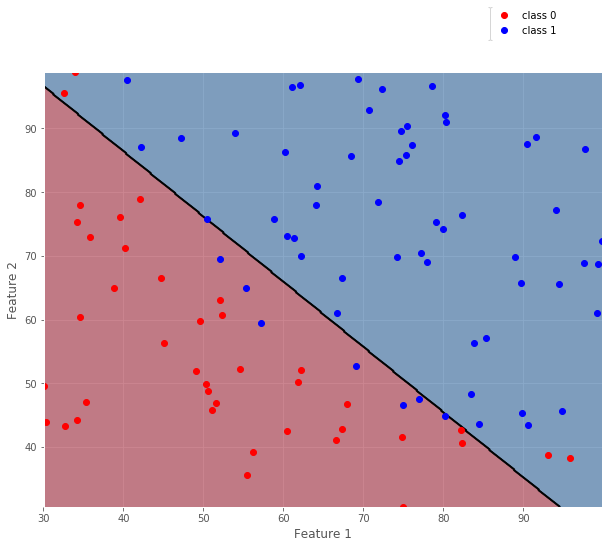

In [12]:
X,Y,m,bias,theta = ReadData('LogRegDS.txt',',')
costweight = 1/m
initial_theta = np.insert(theta,0,bias)
cost = CostCalc(initial_theta,X,Y,costweight)
#print(cost)
initial_theta = np.insert(theta,0,bias)
Result = op.minimize(fun = CostCalc, x0 = initial_theta, args = (X,Y,costweight), method = 'BFGS', jac = GradientDescent)
#print(Result)
cost = Result.fun
trained_theta = Result.x
P = Predict(trained_theta, X)
error = costweight * sum(np.abs(P-Y)) * 100
Accuracy = 100 - error[0]
print(f'Accuracy = {Accuracy} %\ncost = {cost}')
PlotData(trained_theta, X,Y)